In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
label = []

In [3]:
ficheiro = open("..\\Dataset\\22-02-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(len(linha) - 1) + "", '%d/%m/%Y %H:%M:%S\n\n').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [4]:
label.sort(key = lambda array : array[len(array) - 1])

In [5]:
print(label[10])

['80.0', '6.0', '6698591.0', '4.0', '4.0', '97.0', '231.0', '97.0', '0.0', '24.25', '48.5', '231.0', '0.0', '57.75', '115.5', '48.9655212566', '1.1942810063', '956941.571428571', '2504710.44277836', '6636859.0', '41.0', '61732.0', '20577.3333333333', '35335.3462461221', '61379.0', '108.0', '6698387.0', '2232795.66666667', '3866773.40587024', '6697761.0', '275.0', '0', '0', '0', '0', '92.0', '92.0', '0.5971405031', '0.5971405031', '0.0', '231.0', '36.4444444444', '79.6996096463', '6352.0277777778', '0', '0', '0', '1', '0', '0', '0', '0', '1.0', '41.0', '24.25', '57.75', '0', '0', '0', '0', '0', '0', '4.0', '97.0', '4.0', '231.0', '8192.0', '141.0', '1.0', '20.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'Benign', datetime.time(1, 0)]


In [6]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [7]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(len(label[i]) - 1)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])
    
print(str(a) + " " + str(b))

362 1042603


In [8]:
print(str(a) + " " + str(b))

362 1042603


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [10]:
inp = []
out = []
num = 0
for i in range(len(input_label) - 20 + 1):
    aux = []
    for j in range(i, i + 20):
        aux.append(input_label[j])
    inp.append(aux)
    out.append(output_label[i + 20 - 1])

In [11]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = 0.2, shuffle = False)

In [12]:
input_label = []
output_label = []
inp = []
out = []
gc.collect()

15

In [13]:
inp_train = np.array(inp_train)#.reshape(len(inp_train), 78,1)
out_train = np.array(out_train)#.reshape(len(out_train),1)
inp_test = np.array(inp_test)#.reshape(len(inp_test), 78,1)
out_test = np.array(out_test)#.reshape(len(out_test),1)

In [14]:
print(inp_train.shape)

(834356, 20, 78)


In [15]:
model = keras.Sequential([
    layers.LSTM(units = 128, input_shape = (20, 78), return_sequences = True, use_bias = True),
    layers.LSTM(units = 64, return_sequences = True, use_bias = True),
    layers.LSTM(units = 32, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [16]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, epochs= 10, verbose = 1)

Epoch 1/10
23467/23467 [==============================] - 589s 24ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.0099 - val_accuracy: 0.9988
Epoch 2/10
23467/23467 [==============================] - 501s 21ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0100 - val_accuracy: 0.9988
Epoch 3/10
23467/23467 [==============================] - 502s 21ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 4/10
23467/23467 [==============================] - 500s 21ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0100 - val_accuracy: 0.9988
Epoch 5/10
23467/23467 [==============================] - 502s 21ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0099 - val_accuracy: 0.9988
Epoch 6/10
23467/23467 [==============================] - 501s 21ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0100 - val_accuracy: 0.9988
Epoch 7/10
23467/23467 [==============================] - 497s 21ms/step - loss: 0.0031 - accuracy: 0.9997

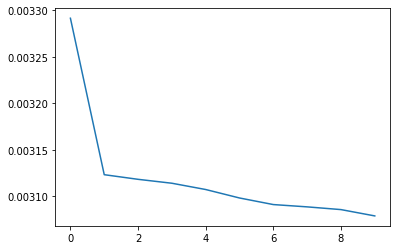

In [20]:
plt.plot(train.history["loss"])
plt.show()

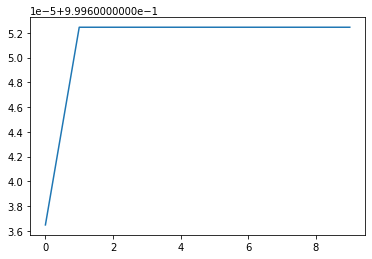

In [21]:
plt.plot(train.history["accuracy"])
plt.show()

In [22]:
model.save("LSTMWebXssBruteForceNet(22-02-2018)V2.h5")

In [23]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [24]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [25]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[208590]]


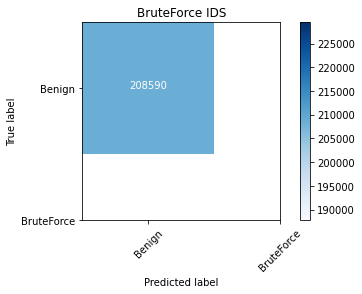

In [26]:
labels = ["Benign", "BruteForce"]
plot_confusion_matrix(cm = cm, classes = labels, title = "BruteForce IDS")